<a href="https://colab.research.google.com/github/gcosma/DeepLearningTutorials/blob/master/SampleSize%26PowerCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Overview: Carry out power analysis for the case of the independent two-sample t-test (equal sample sizes and variances) and calculate power curves for varying sample and effect size




by Georgina Cosma

The aim of this tutorial is to provide a simple way of calculating sample size and statistical power. The tutorial aims to help you answer two questions: 

"Q1: How big a sample size do I need for my study?”  

“Q2: how much statistical power does my study have?” *


The content was inspired by Jason Brownlee's tutorial , https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/  so if you want more explanations please visit Jason's tutorial. 

Calculating sample sizes is not so straight forward, and it is always best to consult a statistician. 

I have tried to keep text to a minimal (to avoid repeating Jason's explanations) but I added extra explanations to help readers need a bit of extra help understanding statistical concepts. 


# **Question 1: How big a sample size do I need?**

**Type of Power Analysis** A priori: Compute required sample size - given significance, power, and effect size.

Some notation:

**t-test** A t-test is used as a statistical hypothesis testing test, to determine the difference between two independent means (two groups).  In other words, it is a test for comparing the means from two samples.

**Type I error - alpha:** the probability of making a Type I error (α-level, two-sided), i.e. the probability of rejecting the null hypothesis when in fact it is true.

**Type II error - beta:** the probability of making a Type II error (β-level), i.e. the probability of accepting the null hypothesis when in fact it is false.

**Ratio of sample sizes in Group 1 / Group 2:** the ratio of the sample sizes in group 1 and 2. Enter 1 for equal sample sizes in both groups. Enter 2 if the number of cases in group 1 must be double of the number of cases in group 2.

**Alternative:** is whether the power is calculated for a two-sided (default) or one sided test. The one-sided test can be either ‘larger’, ‘smaller’. If you need more information see here https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/

See this for a example in finance: https://www.investopedia.com/terms/o/one-tailed-test.asp

See this for examples in bioinformatics https://www.sciencedirect.com/topics/nursing-and-health-professions/one-tailed-test

This tutorial is using the  [solve_power() function](https://https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestIndPower.solve_power.html#statsmodels.stats.power.TTestIndPower.solve_power)


In [0]:
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
from google.colab import files
from IPython.display import Image

uploaded=files.upload()
Image('solve_power2.jpg', width=550)

In [0]:
# Task: We will now estimate a suitable sample size via power analysis. 

# Given a set of predefined values shown in Parameter values below, estimate a suitable sample size.

#That is, how many observations are required from each sample in order to at least detect an effect of 0.80 
#with an 80% chance of detecting the effect if it is true (20% of a Type II error) 
#and a 5% chance of detecting an effect if there is no such effect (Type I error).

#Note: Cohen suggested that d=0.2 be considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size. 
#  This means that if two groups' means don't differ by 0.2 standard 
#  deviations or more, the difference is trivial, even if it is statistically signficant.

from statsmodels.stats.power import TTestIndPower

################### Parameters values ######################################################################
# Parameters for power analysis. Change these to fit your own study. 
############################################################################################################

effect_size = 0.8 # if you are not sure about this use the G*Power calculator. It will calculate it for you.
nobs1=None
alpha = 0.05 # Type I error (Alpha, Significance)
power = 0.8 # Power is 1 minues the probability of a type II error. 
#Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.
ratio=1 # Ratio of sample sizes in Group 1/Group 2.
alternative='two-sided' #‘two-sided’ (default), for one-sided choose ‘larger’ or ‘smaller’.
##############################################################################################################

# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, power=power, ratio=ratio, alternative=alternative)
req_sample_size1=(result)
req_sample_size2=(result*ratio)
total_sample_size=(req_sample_size1)+(req_sample_size2)

#Print the result
print('Required sample size for group 1: %.0f' % req_sample_size1) #replace the 0 in %.0f based on the number of decimal places you want displayed.
print('Required sample size for group 2: %.0f' % req_sample_size2) #replace the 0 in %.0f based on the number of decimal places you want displayed.

print('\nTotal sample size: %.0f' % total_sample_size)

Required sample size for group 1: 19
Required sample size for group 2: 38

Total sample size: 57


**Here are the results from running the test using the G* Power  calculator**
You may also use the  [G*Power](http://www.psychologie.hhu.de/arbeitsgruppen/allgemeine-psychologie-und-arbeitspsychologie/gpower.html): Statistical Power Analyses for Windows and Mac tool. The G*Power tool is easy to use. The G*Power tool calculates the Actual Power and the total sample size based on the actual power and not the input parameter, so the G*Power tool is more accurate, although the difference is small.

G*Power is a dedicated Statistical Analysis calculator meaning that it provides more information and therefore it is highly recommended to use G*. 

G*Power is a tool to compute statistical power analyses for many different t tests, F tests, χ2 tests, z tests and some exact tests. G*Power can also be used to compute effect sizes and to display graphically the results of power analyses.

**G*Power is free for everyone. Commercial distribution is strictly prohibited.G*Power is free for everyone. Commercial distribution is strictly prohibited.bold text**


In [0]:
uploaded=files.upload()
Image('GPower1.jpg', width=550)

#Question 2: How much statistical power does my study have?

**Task: Calculate power curves.**


**What is Power of Test?** A test's power is the probability of correctly rejecting the null hypothesis when it is false; a test's power is influenced by the choice of significance level for the test, the size of the effect being measured, and the amount of data available.

Power of the test, e.g. 0.8, is one minus the probability of a type II error. Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.

Intelligent analysis of power and sample size requires the construction, and careful evaluation, of graphs relating power, sample size, the amount by which the null hypothesis is wrong (i.e., the experimental effect), and other factors such as Type I error rate.

**Power curves** are line plots that show how the change in variables, such as effect size and sample size, impact the power of the statistical test.

The plot_power() function can be used to create power curves. The dependent variable (x-axis) must be specified by name in the ‘dep_var‘ argument. 

Arrays of values can then be specified for the sample size (nobs), effect size (effect_size), and significance (alpha) parameters. One or multiple curves will then be plotted showing the impact on statistical power.

For example, we can assume a significance of 0.01 and 0.05 (the default for the function) and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8) sizes.

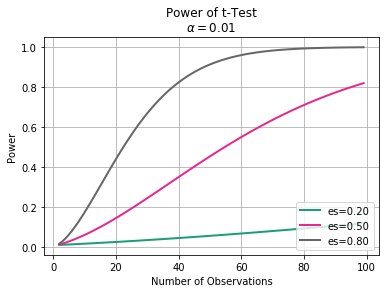

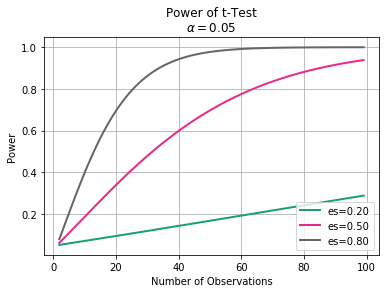

In [0]:
# power vs. number of observations 
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8]) # The larger the effect size, the less likely it is to be random error. 
sample_sizes = array(range(2, 100))

# calculate power curves from multiple power analyses 
#assume a significance of 0.01 and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8)sizes.
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.01, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
pyplot.grid()
pyplot.ylabel('Power')
pyplot.show()

# calculate power curves from multiple power analyses
#assume a significance of 0.05 and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8)sizes.
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05, title='Power of t-Test' + '\n' + r'$\alpha = 0.05$')
pyplot.grid()
pyplot.ylabel('Power')
pyplot.show()

**Power of T-Test a=0.01 Curve.** The graph shows the relationship between trial size and power. The sample size ( ~40) would be necessary to achieve 80% power with an α of 0.01 and a high effect size.

**Power of T-Test a=0.05 Curve.** The graph shows the relationship between trial size and power. The sample size ( ~25) would be necessary to achieve 80% power with an α of 0.05 and a high effect size. Comparing the results we obtained from Question 1, the results are consistent, and hence a 26 samples from each group would be needed. 

*Finally, larger sample sizes allow hypothesis tests to detect smaller effects. The larger the effect size, the less likely it is to be random error.*
